In [ ]:
!pip install xgboost
!pip install umap-learn
!pip install umap-learn[plot]

In [9]:
import fastai; fastai.__version__

'2.2.5'

In [2]:
from multiscorer.multiscorer import MultiScorer
#Scikit's libraries for demonstration
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, log_loss, roc_auc_score
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection  import GridSearchCV
from sklearn.svm import SVC 
from numpy import average
import pickle5 as pickle
import scikitplot as skplt
# some_file.py
#import sys
# insert at 1, 0 is the script path (or '' in REPL)
#sys.path.insert(1, '/home/ubuntu/workspace/AMPsDetector/src')
#from sklearn_helper import *

# GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [3]:
def lengthDistribution(df,title):
    fig = plt.figure()
    ax = fig.gca()
    pd.Series(df['length']).hist(color='blue', bins=200, ax=ax)
    plt.ylabel('Num of Seq with this length ')
    plt.xlabel('Length of Seq')
    plt.title(title)

def plotCharDistribution(dict_counts, char_totalsize, title):
    fig = plt.figure()
    fig.suptitle(title, fontsize=20)
    ax = fig.add_subplot(111)
    # The bar chart, with letters along the horizontal axis and the calculated
    # letter frequencies as percentages as the bar height
    x = range(len(dict_counts))
    letters =  dict_counts.keys()
    ax.bar(x, [val / char_totalsize * 100 for key,val in dict_counts.items()], width=0.8,
        color='g', alpha=0.5, align='center')
    ax.set_xticks(x)
    ax.set_xticklabels(letters)
    ax.tick_params(axis='x', direction='out')
    ax.set_xlim(-0.5, 25.5)
    ax.yaxis.grid(True)
    ax.set_ylabel('Letter frequency, %')

def countProtien(df, title):
    # count Sequence 
    records = df['Sequence']
    print("Count Records:", len(records))
    # countAminoAcids
    counts = Counter()
    for index, row in df.iterrows():
        line= row['Sequence']
        counts.update(line.rstrip())
        total = float(sum(counts.values()))
    sorted_dict = {key: value for key, value in sorted(counts.items())}
    for key,val in sorted_dict.items():
        print("{}: {}, ({:.2%})".format(key,val, val / total))

    plotCharDistribution(sorted_dict, total, title)

In [11]:
# We'll use matplotlib for graphics.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

# We import seaborn to make nice plots.
#import seaborn as sns
#sns.set_style('darkgrid')
#sns.set_palette('muted')
#sns.set_context("notebook", font_scale=1.5,
#                rc={"lines.linewidth": 2.5})


In [17]:
with open( "/mnt/vdb/thesis/trainingset2/set9/jax/AMPNonAMP.reps", 'rb') as file:
    AMPs_df = pickle.load(file)
#AMPs_df = AMPs_df[AMPs_df["length"] <= 300 ]
with open( "/mnt/vdb/thesis/trainingset2/benchmark_set/jax/AMPNonAMP.benchmark_set.reps", 'rb') as file:
    benchmark_AMPs_df = pickle.load(file)

In [4]:
import pickle5 as pickle
AMPs_df = pd.read_pickle('/mnt/vdb/thesis/jax/AMPNonAMP.V5_C08_sim60.reps')

In [ ]:
AMPs_df =AMPs_df[AMPs_df["length"] <=30 ]
AMPs_df 

In [18]:
AMPs_df


,ID,Sequence,length,class,reps
109,"+4S_Peptide,V681_V13K,K1S,K10S,K14S,",SWKSFLKTFSSAKSTVLHTALKAISS,26,0,"[0.025307096540927887, -0.018782345578074455, ..."
110,",linocinCFP29_homolog,",MDLLKRELAPILPAAWDLIDHEATRVLKLHLAGRKVVDFRGPFGWE...,253,0,"[0.007708000484853983, 0.061237141489982605, 0..."
117,"-10,A11,",RRKKAAVALL,10,0,"[0.06724510341882706, 0.021797021850943565, -0..."
118,"-11,A12,",RRKKAAVAL,9,0,"[0.07372646778821945, 0.024370301514863968, -0..."
119,"-12,B1,",RRKKAAVA,8,0,"[0.08178428560495377, 0.028192659839987755, -0..."
...,...,...,...,...,...
129,"αs1-casein_f90_95,",RYLGYL,6,0,"[0.08635857701301575, 0.04551044851541519, -0...."
132,"β-Casomorphins_5_f60_64,",YPFPG,5,0,"[0.10100759565830231, 0.035976558923721313, -0..."
131,"β126-145,Bovine_hemoglobin_beta_chain_126-145,",QADFQKVVAGVANALAHRYH,20,0,"[0.03266279399394989, -0.05012352392077446, -0..."
134,"∆1,2Mac,Maculatin_1.1.1,",FGVLAKVAAHVVPAIAEHF,19,0,"[0.03144867345690727, 0.002185762394219637, -0..."


In [12]:
AMPs_df[AMPs_df["class"] == 1].describe()

,length,class
count,22169.000000,22169.0
mean,48.230592,1.0
std,84.998578,0.0
min,11.000000,1.0
25%,17.000000,1.0
50%,21.000000,1.0
75%,50.000000,1.0
max,2337.000000,1.0


Count Records: 22169
A: 80453, (7.52%)
C: 20673, (1.93%)
D: 55624, (5.20%)
E: 65087, (6.09%)
F: 40344, (3.77%)
G: 72002, (6.73%)
H: 24383, (2.28%)
I: 56332, (5.27%)
K: 61542, (5.76%)
L: 98501, (9.21%)
M: 35138, (3.29%)
N: 46449, (4.34%)
P: 50618, (4.73%)
Q: 42418, (3.97%)
R: 60347, (5.64%)
S: 83713, (7.83%)
T: 62924, (5.89%)
V: 68771, (6.43%)
W: 13248, (1.24%)
Y: 30657, (2.87%)


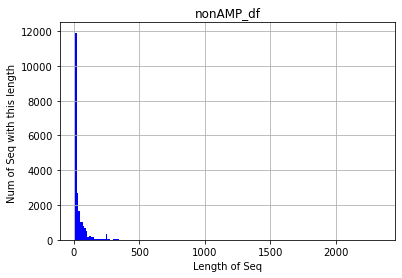

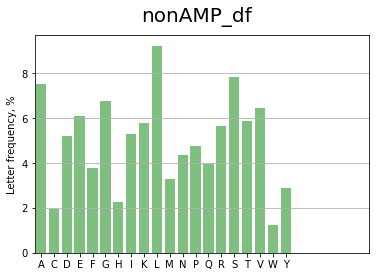

In [16]:
lengthDistribution(AMPs_df[AMPs_df["class"] == 1],"nonAMP_df")
countProtien(AMPs_df[AMPs_df["class"] == 1],"nonAMP_df")

In [14]:
#AMPs_df.drop_duplicates(subset=['Sequence'],inplace=True)
AMPs_df.sample(frac=0.9, replace=True, random_state=42)

,ID,Sequence,length,class,reps
320,DRAMP26832|specific_amps,AHCLRSHNSPSYLPAHVHRA,20,0,"[0.0315491184592247, -0.0841485932469368, -0.0..."
30,17027_dbaasp|dbaasp.peptides,ILGTILGLLKNL,12,0,"[0.04784048721194267, 0.02358427457511425, -0...."
402,UniRef50_A0A5K1CUH6,MLLVAWYDTITTQISRPRIL,20,1,"[0.031802527606487274, -0.0015637961914762855,..."
181,UniRef50_I1YB99,CCTDLCYFGCQPCCW,15,1,"[0.03886500373482704, -0.02016228251159191, -0..."
386,DRAMP22159|specific_amps,CRHLPGVELVKISL,14,0,"[0.04159388318657875, -0.042286116629838943, -..."
...,...,...,...,...,...
367,UniRef50_A0A1A7Z7V5,RGSKMEYILNITQPTLHAQELKNKTGQFNIKMMPNLGSYCGHVVYK...,75,1,"[0.010868006385862827, -0.06795396655797958, 0..."
427,UniRef50_A0A0K2U0D3,MLLETENYVDSR,12,1,"[0.04731844738125801, -0.006830301601439714, -..."
50,"32,",MYNCSLQNGFTMKVDDLIVH,20,0,"[0.033177416771650314, -0.030663229525089264, ..."
69,UniRef50_A0A443QC97,MHTLNTEQPVNCLKINCFGHIISQCGSRNIDVYSINGRHLYSLSNN...,130,1,"[0.009786049835383892, -0.06231172755360603, 0..."


In [4]:
X_train =np.array(AMPs_df['reps'].to_list())
y_train = np.array(AMPs_df['class'].to_list())
X_test = np.array(benchmark_AMPs_df["reps"].to_list())
y_test =np.array( benchmark_AMPs_df["class"].to_list())

In [ ]:
df = pd.concat([AMPs_df.pop('reps').apply(pd.Series), AMPs_df['class'],AMPs_df['ID'],AMPs_df['length']], axis=1)
X = df_new.iloc[:,:-1]
y = df_new.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [5]:
X= np.array(AMPs_df['reps'].to_list())
y= np.array(AMPs_df['class'].to_list())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [11]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def confusion_Matrix(classifier, X_test, y_test):
    class_names = ['AMPs', 'NonAMPs']

    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                display_labels = class_names,
                                cmap=plt.cm.Blues, xticks_rotation='vertical')

    disp.ax_.set_title(" Confusion Matrix")

    print(disp.confusion_matrix)
    plt.grid(False)
    plt.show()

def create_roc_curve(labels, scores, positive_label):
  fpr, tpr, thresholds = roc_curve(labels, scores, pos_label=positive_label)
  roc_auc = auc(fpr, tpr)

  plt.title('Receiver Operating Characteristic' )
  plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
  plt.legend(loc='lower right')
  plt.plot([0,1],[0,1],'r--')
  plt.xlim([-0.1,1.2])
  plt.ylim([-0.1,1.2])
  plt.xlabel('False Positive Rate or (1 - Specifity)')
  plt.ylabel('True Positive Rate or (Sensitivity)')
  plt.show()

def create_precision_recall_curve(model, y_test, x_test, pred):
    average_precision = average_precision_score(y_test, pred)
    disp = plot_precision_recall_curve(XGBmodel, x_test, y_test)
    disp.ax_.set_title('2-class Precision-Recall curve')

In [9]:
XGBmodel = XGBClassifier( n_jobs=24, random_state=42, verbosity=1)
XGBmodel.fit(X_train,y_train) 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=24, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=1)

              precision    recall  f1-score   support

           0       0.92      0.91      0.92     13856
           1       0.91      0.92      0.91     13622

    accuracy                           0.92     27478
   macro avg       0.92      0.92      0.92     27478
weighted avg       0.92      0.92      0.92     27478

Accuracy:0.9153504621879321
[[12670  1186]
 [ 1140 12482]]


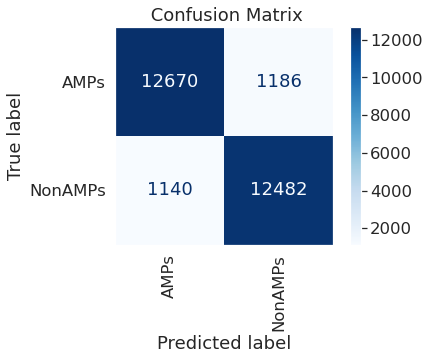

In [11]:
pred = XGBmodel.predict(X_test)
print(classification_report(y_test,pred))
print("Accuracy:"+str(accuracy_score(y_test, pred)))
confusion_Matrix(XGBmodel, X_test, y_test)

In [11]:
score = cross_val_score(XGBmodel, X_test, y_test, scoring='accuracy', cv=10).mean()#
print('Cross-Validation Accuracy:', score, '\n', '\n')

Cross-Validation Accuracy: 0.9017413272239041 
 



In [16]:
XGBmodel.save_model("/mnt/vdb/thesis/best_XGBmodel.model")

In [14]:
XGBmodel = XGBClassifier( n_jobs=20, random_state=42, verbosity=1)
cross_val_score(XGBmodel, X, y, cv=10, scoring=scorer )

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

In [15]:

results_XG = scorer.get_results()
for metric in results_XG.keys():
  print("%s: %.3f" % (metric, average(results_XG[metric])))

accuracy: 0.817
precision: 0.775
recall: 0.924
f1: 0.838
roc_auc: 0.819
neg_log_loss: 6.304


# Trainingset2

In [7]:
XGBmodel = XGBClassifier( n_jobs=24, random_state=42, verbosity=1)
XGBmodel.fit(X_train,y_train) 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=24, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=1)

## SET 1

In [7]:
# SET1
pred = XGBmodel.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.56      0.97      0.71      1778
           1       0.88      0.23      0.37      1778

    accuracy                           0.60      3556
   macro avg       0.72      0.60      0.54      3556
weighted avg       0.72      0.60      0.54      3556



In [58]:
# SET 3
pred = XGBmodel.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.63      0.61      0.62      1778
           1       0.62      0.64      0.63      1778

    accuracy                           0.62      3556
   macro avg       0.62      0.62      0.62      3556
weighted avg       0.62      0.62      0.62      3556



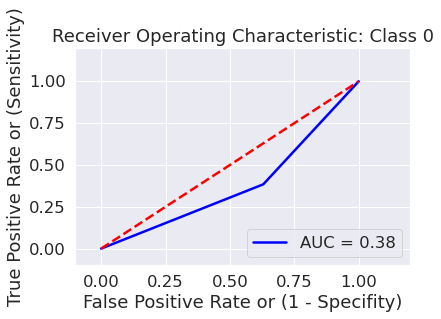

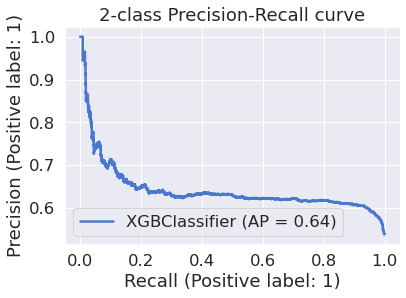

In [53]:
create_roc_curve(y_test,pred,1)
create_precision_recall_curve(XGBmodel, y_test, X_test,pred )


              precision    recall  f1-score   support

           0       0.60      0.94      0.73      1778
           1       0.86      0.38      0.53      1778

    accuracy                           0.66      3556
   macro avg       0.73      0.66      0.63      3556
weighted avg       0.73      0.66      0.63      3556



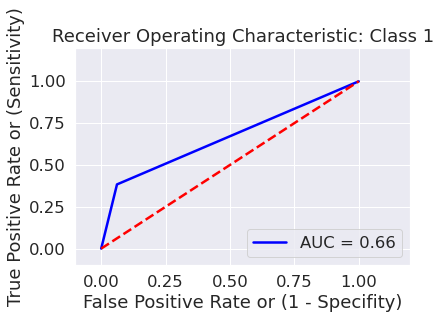

NameError: name 'XGBmodel' is not defined

In [25]:
## SET 4
XGBmodel = XGBClassifier( n_jobs=24, random_state=42, verbosity=1 )
XGBmodel.fit(X_train,y_train) 
pred = XGBmodel.predict(X_test)
print(classification_report(y_test,pred))
create_roc_curve(y_test,pred,1)
create_precision_recall_curve(XGBmodel, y_test, X_test,pred )

## PWS 

### Note:
1. AMPnonAMP.sim60_c08.pwm.pkl
```
np.array([0] * 68869 + [1] * 68520)
```

In [3]:
with open( '/mnt/vdb/thesis/pwm/AMPnonAMP.sim60_c08.pssm.pkl', 'rb') as file:
    AMPNonAMP_df = pickle.load(file)

In [4]:
#Y1 =np.array([0] * 68869 + [1] * 68520)
#X_train, X_test, y_train, y_test = train_test_split(AMPNonAMP_df, Y1, test_size=0.2, random_state=42)
X= np.array(AMPNonAMP_df['reps'].to_list())
y= np.array(AMPNonAMP_df['class'].to_list())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [5]:
XGBmodel = XGBClassifier( n_jobs=24, random_state=42, verbosity=1)
XGBmodel.fit(X_train,y_train) 
pred = XGBmodel.predict(X_test)
print(classification_report(y_test,pred))
print("Accuracy:"+str(accuracy_score(y_test, pred)))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      8726
           1       0.83      0.87      0.85      8566

    accuracy                           0.84     17292
   macro avg       0.85      0.84      0.84     17292
weighted avg       0.85      0.84      0.84     17292

Accuracy:0.8446102243812168


In [20]:
XGBmodel.save_model("/mnt/vdb/thesis/best_XGBmodel.pssm.model")

In [20]:
with open( "/mnt/vdb/thesis/trainingset2/set1/pssm/AMP/AMP.pssm.plk", 'rb') as file:
    AMPs_df = pickle.load(file)
AMPs_df["class"] = 0
with open( "/mnt/vdb/thesis/trainingset2/set1/pssm/nonAMP/nonAMP.pssm.plk", 'rb') as file:
    nonAMPs_df = pickle.load(file)   
nonAMPs_df["class"] = 1

AMPNonAMP_df = pd.concat([AMPs_df, nonAMPs_df], ignore_index=True)

#AMPs_df = AMPs_df[AMPs_df["length"] <= 300 ]
with open( "../datasets/thesis/trainingset2/benchmark_set/AMPnonAMP.pssm.pkl", 'rb') as file:
    benchmark_AMPs_df = pickle.load(file)
    
X_train = np.array(AMPNonAMP_df['reps'].to_list())
y_train = np.array(AMPNonAMP_df['class'].to_list())
X_test = np.array(benchmark_AMPs_df["reps"].to_list())
y_test = np.array( benchmark_AMPs_df["class"].to_list())

In [ ]:
## SET 1


In [14]:
XGBmodel = XGBClassifier( n_jobs=24, random_state=42, verbosity=1)
XGBmodel.fit(X_train,y_train) 
pred = XGBmodel.predict(X_test)
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.60      0.95      0.74      1778
           1       0.88      0.38      0.53      1778

    accuracy                           0.66      3556
   macro avg       0.74      0.66      0.63      3556
weighted avg       0.74      0.66      0.63      3556



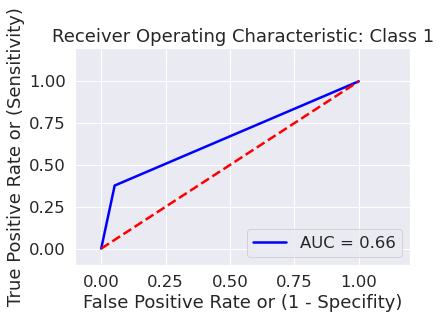

NameError: name 'XGBmodel' is not defined

In [20]:
create_roc_curve(y_test,pred,1)
create_precision_recall_curve(XGBmodel, y_test, X_test,pred )


In [34]:
## SET 3

with open( "/mnt/vdb/thesis/trainingset2/set3/pssm/AMP/AMP.pssm.plk", 'rb') as file:
    AMPs_df = pickle.load(file)
AMPs_df["class"] = 0
with open( "/mnt/vdb/thesis/trainingset2/set3/pssm/nonAMP/nonAMP.pssm.plk", 'rb') as file:
    nonAMPs_df = pickle.load(file)   
nonAMPs_df["class"] = 1

AMPNonAMP_df = pd.concat([AMPs_df, nonAMPs_df], ignore_index=True)

#AMPs_df = AMPs_df[AMPs_df["length"] <= 300 ]
with open( "../datasets/thesis/trainingset2/benchmark_set/AMPnonAMP.pssm.pkl", 'rb') as file:
    benchmark_AMPs_df = pickle.load(file)
    
X_train = np.array(AMPNonAMP_df['reps'].to_list())
y_train = np.array(AMPNonAMP_df['class'].to_list())
X_test = np.array(benchmark_AMPs_df["reps"].to_list())
y_test = np.array( benchmark_AMPs_df["class"].to_list())

In [27]:
XGBmodel = XGBClassifier( n_jobs=24, random_state=42, verbosity=1)
XGBmodel.fit(X_train,y_train) 
pred = XGBmodel.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.67      0.74      0.70      1778
           1       0.71      0.63      0.67      1778

    accuracy                           0.69      3556
   macro avg       0.69      0.69      0.69      3556
weighted avg       0.69      0.69      0.69      3556



In [23]:
## set 9 
with open( "/mnt/vdb/thesis/trainingset2/set9/pssm/AMP/AMP.pssm.plk", 'rb') as file:
    AMPs_df = pickle.load(file)
AMPs_df["class"] = 0
with open( "/mnt/vdb/thesis/trainingset2/set9/pssm/nonAMP/nonAMP.pssm.plk", 'rb') as file:
    nonAMPs_df = pickle.load(file)   
nonAMPs_df["class"] = 1

AMPNonAMP_df = pd.concat([AMPs_df, nonAMPs_df], ignore_index=True)

#AMPs_df = AMPs_df[AMPs_df["length"] <= 300 ]
with open( "../datasets/thesis/trainingset2/benchmark_set/AMPnonAMP.pssm.pkl", 'rb') as file:
    benchmark_AMPs_df = pickle.load(file)
    
X_train = np.array(AMPNonAMP_df['reps'].to_list())
y_train = np.array(AMPNonAMP_df['class'].to_list())
X_test = np.array(benchmark_AMPs_df["reps"].to_list())
y_test = np.array( benchmark_AMPs_df["class"].to_list())


In [22]:
XGBmodel = XGBClassifier( n_jobs=24, random_state=42, verbosity=1)
XGBmodel.fit(X_train,y_train) 
pred = XGBmodel.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1778
           1       0.83      0.79      0.81      1778

    accuracy                           0.81      3556
   macro avg       0.81      0.81      0.81      3556
weighted avg       0.81      0.81      0.81      3556



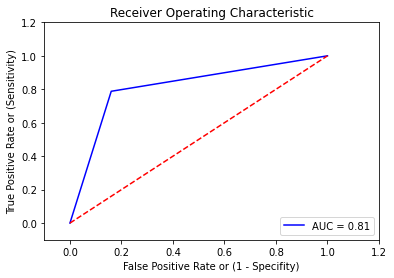

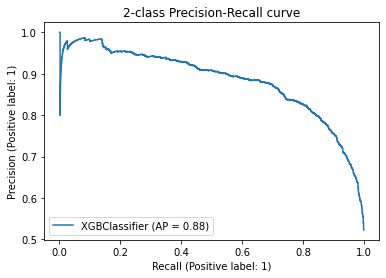

In [23]:
create_roc_curve(y_test,pred,1)
create_precision_recall_curve(XGBmodel, y_test, X_test,pred )

In [25]:
kfold = StratifiedKFold(n_splits=5, shuffle=True,  random_state=42)
scoring = ['accuracy', 'f1', 'roc_auc', 'recall', 'precision','neg_log_loss']
scores = cross_validate(
    XGBmodel, X_train, y_train, scoring=scoring, cv=kfold, return_train_score=True )
print("Accuracy TEST: %0.2f (+/- %0.2f) Accuracy TRAIN: %0.2f (+/- %0.2f)" %
      (scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2, scores['train_accuracy'].mean(), scores['train_accuracy'].std() * 2))
print("F1 TEST: %0.2f (+/- %0.2f) F1 TRAIN : %0.2f (+/- %0.2f) " %
      (scores['test_f1'].mean(), scores['test_f1'].std() * 2, scores['train_f1'].mean(), scores['train_f1'].std() * 2))
print("AUROC TEST: %0.2f (+/- %0.2f) AUROC TRAIN : %0.2f (+/- %0.2f)" %
      (scores['test_roc_auc'].mean(), scores['test_roc_auc'].std() * 2, scores['train_roc_auc'].mean(), scores['train_roc_auc'].std() * 2))
print("recall TEST: %0.2f (+/- %0.2f) recall TRAIN: %0.2f (+/- %0.2f)" %
      (scores['test_recall'].mean(), scores['test_recall'].std() * 2, scores['train_recall'].mean(), scores['train_recall'].std() * 2))
print("Precision TEST: %0.2f (+/- %0.2f) Precision TRAIN: %0.2f (+/- %0.2f)" %
      (scores['test_precision'].mean(), scores['test_precision'].std() * 2, scores['train_precision'].mean(), scores['train_precision'].std() * 2))
print("Log loss TEST: %0.2f (+/- %0.2f) Log loss TRAIN: %0.2f (+/- %0.2f)" %
      (scores['test_neg_log_loss'].mean(), scores['test_neg_log_loss'].std() * 2, scores['train_neg_log_loss'].mean(), scores['train_neg_log_loss'].std() * 2))

Accuracy TEST: 0.88 (+/- 0.00) Accuracy TRAIN: 0.92 (+/- 0.00)
F1 TEST: 0.88 (+/- 0.00) F1 TRAIN : 0.92 (+/- 0.00) 
AUROC TEST: 0.95 (+/- 0.00) AUROC TRAIN : 0.97 (+/- 0.00)
recall TEST: 0.90 (+/- 0.01) recall TRAIN: 0.94 (+/- 0.00)
Precision TEST: 0.86 (+/- 0.01) Precision TRAIN: 0.90 (+/- 0.00)
Log loss TEST: -0.29 (+/- 0.01) Log loss TRAIN: -0.22 (+/- 0.00)


In [12]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score


inputs =X_train
targets = y_train
# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []
_precision = []
_recal = []
_f1 = []
_auc_pr = []
_roc_pr = []
# Define the K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train_index, test_index  in kfold.split(inputs, targets):
    
    X_train= inputs[train_index]
    y_train= targets[train_index]

    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    model = XGBClassifier( n_jobs=24, random_state=42, verbosity=1)
    model.fit(X_train,y_train)
    # Generate generalization metrics

    # predict probabilities for test set
    y_predict = model.predict(X_test)

    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_predict, y_test)
    print('Accuracy: %f' % accuracy)
    # precision tp / (tp + fp)
    precision = (precision_score(y_predict,y_test, pos_label= 1)+precision_score(y_predict,y_test , pos_label= 0))*0.5
    print('Precision: %f' % precision)
    # recall: tp / (tp + fn)
    recall = (recall_score(y_predict,y_test, pos_label= 1)+recall_score(y_predict,y_test , pos_label= 0))*0.5
    print('Recall: %f' % recall)
    # f1: 2 tp / (2 tp + fp + fn)
    f1 =  (f1_score(y_predict,y_test, pos_label= 1)+f1_score(y_predict,y_test , pos_label= 0))*0.5
    print('F1 score: %f' % f1)
    
    acc_per_fold.append(accuracy * 100)
    _precision.append(precision * 100)  
    _recal.append(recall * 100)  
    _f1.append(f1 * 100)  
 
    # Increase fold number
    fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Pecision: {np.mean(_precision)} (+- {np.std(_precision)})')
print(f'> Recall: {np.mean(_recal)} (+- {np.std(_recal)})')
print(f'> F1: {np.mean(_f1)} (+- {np.std(_f1)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Accuracy: 0.797525
Precision: 0.797525
Recall: 0.798797
F1 score: 0.797310
------------------------------------------------------------------------
Training for fold 2 ...
Accuracy: 0.788526
Precision: 0.788526
Recall: 0.788878
F1 score: 0.788462
------------------------------------------------------------------------
Training for fold 3 ...
Accuracy: 0.795557
Precision: 0.795557
Recall: 0.796439
F1 score: 0.795405
------------------------------------------------------------------------
Training for fold 4 ...
Accuracy: 0.794994
Precision: 0.794994
Recall: 0.795804
F1 score: 0.794854
------------------------------------------------------------------------
Training for fold 5 ...
Accuracy: 0.798088
Precision: 0.798088
Recall: 0.798663
F1 score: 0.797991
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 79.49381327334083 (+- 0.3

/home/ubuntu/.local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ubuntu/.local/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


/home/ubuntu/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

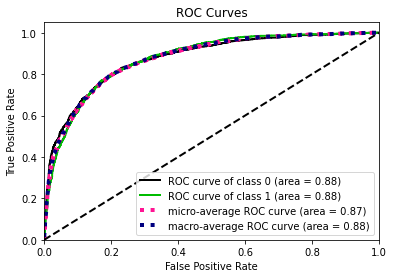

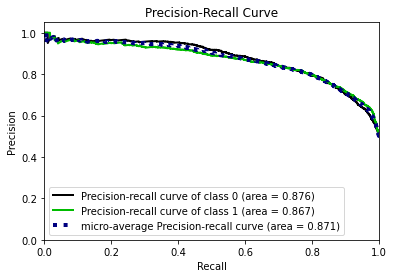

In [15]:
y_prob =  model.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_prob)
skplt.metrics.plot_precision_recall_curve(y_test, y_prob)

In [25]:
model = XGBClassifier()
model.load_model("/mnt/vdb/thesis/best_XGBmodel.pssm.model")
# summarize model.
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=24, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='auto', validate_parameters=1, verbosity=1)

	Brier: 0.132
	Precision: 0.831
	Recall: 0.788
	F1: 0.809



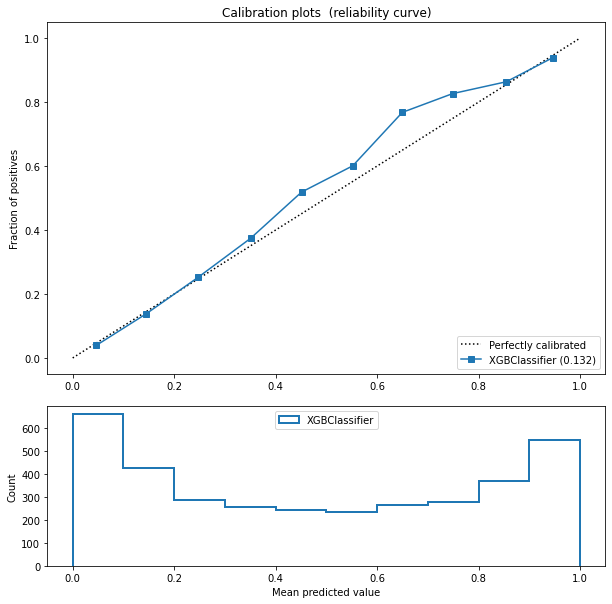

In [26]:
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,
                             f1_score)
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
name = "XGBClassifier"

fig = plt.figure( figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")


y_pred = model.predict(X_test)
if hasattr(model, "predict_proba"):
    prob_pos = model.predict_proba(X_test)[:, 1]
else:  # use decision function
    prob_pos = model.decision_function(X_test)
    prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())

clf_score = brier_score_loss(y_test, prob_pos)

print("\tBrier: %1.3f" % (clf_score)) # Brier score, reported in the legend (the smaller the better).
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=10)

ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
                 label="%s (%1.3f)" % (name, clf_score))

ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
                 histtype="step", lw=2)
 
ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

XGBoost:
	Brier: 0.217
	Precision: 0.711
	Recall: 0.628
	F1: 0.667



TypeError: predict_proba() got an unexpected keyword argument 'X'

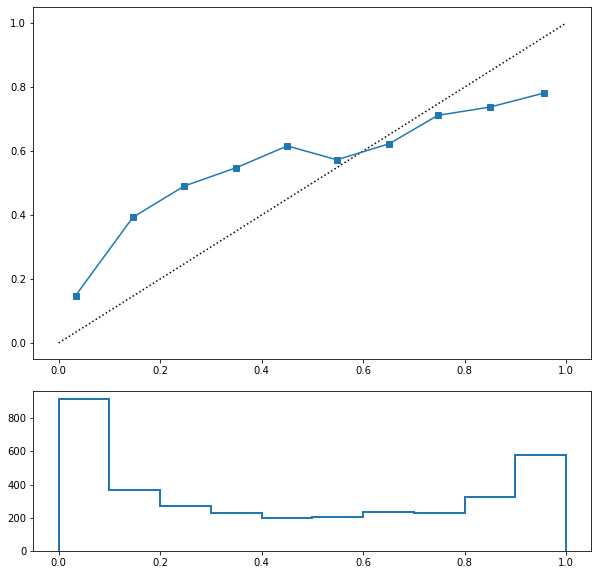

In [36]:
## Recal

def plot_calibration_curve(est, name, fig_index):
    """Plot calibration curve for est w/o and with calibration. """
    # Calibrated with isotonic calibration
    isotonic = CalibratedClassifierCV(est, cv=5, method='isotonic')

    # Calibrated with sigmoid calibration
    sigmoid = CalibratedClassifierCV(est, cv=5, method='sigmoid')

    fig = plt.figure(fig_index, figsize=(10, 10))
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    ax2 = plt.subplot2grid((3, 1), (2, 0))

    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    for clf, name in [
                      (est, name),
                      (isotonic, name + ' + Isotonic'),
                      (sigmoid, name + ' + Sigmoid')]:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        if hasattr(clf, "predict_proba"):
            prob_pos = clf.predict_proba(X_test)[:, 1]
        else:  # use decision function
            prob_pos = clf.decision_function(X_test)
            prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())

        clf_score = brier_score_loss(y_test, prob_pos)
        print("%s:" % name)
        print("\tBrier: %1.3f" % (clf_score))
        print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
        print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
        print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

        fraction_of_positives, mean_predicted_value = \
            calibration_curve(y_test, prob_pos, n_bins=10)

        ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
                 label="%s (%1.3f)" % (name, clf_score))

        ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
                 histtype="step", lw=2)

    ax1.set_ylabel("Fraction of positives")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend(loc="lower right")
    ax1.set_title('Calibration plots  (reliability curve)')

    ax2.set_xlabel("Mean predicted value")
    ax2.set_ylabel("Count")
    ax2.legend(loc="upper center", ncol=2)

    plt.tight_layout()

# Plot calibration curve for Gaussian Naive Bayes
plot_calibration_curve(XGBClassifier(), "XGBoost", 1)

## SET 9 - JAX

In [8]:
pred = XGBmodel.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.75      0.97      0.85      1778
           1       0.96      0.67      0.79      1778

    accuracy                           0.82      3556
   macro avg       0.85      0.82      0.82      3556
weighted avg       0.85      0.82      0.82      3556



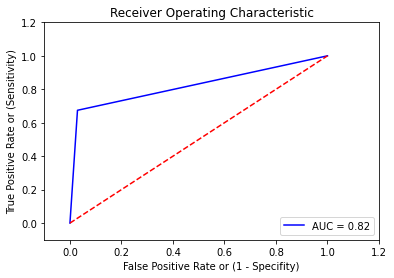

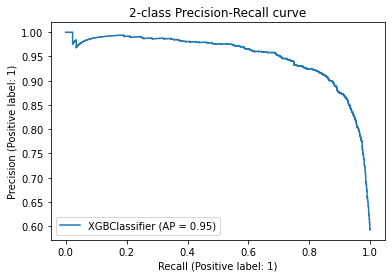

In [12]:
create_roc_curve(y_test,pred,1)
create_precision_recall_curve(XGBmodel, y_test, X_test,pred )

In [19]:
kfold = StratifiedKFold(n_splits=5, shuffle=True,  random_state=42)
scoring = ['accuracy', 'f1', 'roc_auc', 'recall', 'precision','neg_log_loss']
scores = cross_validate(
    XGBmodel, X_train, y_train, scoring=scoring, cv=kfold, return_train_score=True )
print("Accuracy TEST: %0.2f (+/- %0.2f) Accuracy TRAIN: %0.2f (+/- %0.2f)" %
      (scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2, scores['train_accuracy'].mean(), scores['train_accuracy'].std() * 2))
print("F1 TEST: %0.2f (+/- %0.2f) F1 TRAIN : %0.2f (+/- %0.2f) " %
      (scores['test_f1'].mean(), scores['test_f1'].std() * 2, scores['train_f1'].mean(), scores['train_f1'].std() * 2))
print("AUROC TEST: %0.2f (+/- %0.2f) AUROC TRAIN : %0.2f (+/- %0.2f)" %
      (scores['test_roc_auc'].mean(), scores['test_roc_auc'].std() * 2, scores['train_roc_auc'].mean(), scores['train_roc_auc'].std() * 2))
print("recall TEST: %0.2f (+/- %0.2f) recall TRAIN: %0.2f (+/- %0.2f)" %
      (scores['test_recall'].mean(), scores['test_recall'].std() * 2, scores['train_recall'].mean(), scores['train_recall'].std() * 2))
print("Precision TEST: %0.2f (+/- %0.2f) Precision TRAIN: %0.2f (+/- %0.2f)" %
      (scores['test_precision'].mean(), scores['test_precision'].std() * 2, scores['train_precision'].mean(), scores['train_precision'].std() * 2))
print("Log loss TEST: %0.2f (+/- %0.2f) Log loss TRAIN: %0.2f (+/- %0.2f)" %
      (scores['test_neg_log_loss'].mean(), scores['test_neg_log_loss'].std() * 2, scores['train_neg_log_loss'].mean(), scores['train_neg_log_loss'].std() * 2))

Accuracy TEST: 0.89 (+/- 0.00) Accuracy TRAIN: 0.98 (+/- 0.00)
F1 TEST: 0.89 (+/- 0.00) F1 TRAIN : 0.98 (+/- 0.00) 
AUROC TEST: 0.96 (+/- 0.00) AUROC TRAIN : 1.00 (+/- 0.00)
recall TEST: 0.88 (+/- 0.01) recall TRAIN: 0.98 (+/- 0.00)
Precision TEST: 0.89 (+/- 0.00) Precision TRAIN: 0.98 (+/- 0.00)
Log loss TEST: -0.26 (+/- 0.01) Log loss TRAIN: -0.10 (+/- 0.00)


In [18]:
### jax

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score


inputs =X_train
targets = y_train
# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []
_precision = []
_recal = []
_f1 = []
_auc_pr = []
_roc_pr = []
# Define the K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train_index, test_index  in kfold.split(inputs, targets):
    
    X_train= inputs[train_index]
    y_train= targets[train_index]

    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    model = XGBClassifier( n_jobs=24, random_state=42, verbosity=1)
    model.fit(X_train,y_train)
    # Generate generalization metrics

    # predict probabilities for test set
    y_predict = model.predict(X_test)

    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_predict, y_test)
    print('Accuracy: %f' % accuracy)
    # precision tp / (tp + fp)
    precision = (precision_score(y_predict,y_test, pos_label= 1)+precision_score(y_predict,y_test , pos_label= 0))*0.5
    print('Precision: %f' % precision)
    # recall: tp / (tp + fn)
    recall = (recall_score(y_predict,y_test, pos_label= 1)+recall_score(y_predict,y_test , pos_label= 0))*0.5
    print('Recall: %f' % recall)
    # f1: 2 tp / (2 tp + fp + fn)
    f1 =  (f1_score(y_predict,y_test, pos_label= 1)+f1_score(y_predict,y_test , pos_label= 0))*0.5
    print('F1 score: %f' % f1)
    
    acc_per_fold.append(accuracy * 100)
    _precision.append(precision * 100)  
    _recal.append(recall * 100)  
    _f1.append(f1 * 100)  
 
    # Increase fold number
    fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Pecision: {np.mean(_precision)} (+- {np.std(_precision)})')
print(f'> Recall: {np.mean(_recal)} (+- {np.std(_recal)})')
print(f'> F1: {np.mean(_f1)} (+- {np.std(_f1)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Accuracy: 0.818054
Precision: 0.818054
Recall: 0.846204
F1 score: 0.814279
------------------------------------------------------------------------
Training for fold 2 ...
Accuracy: 0.807087
Precision: 0.807087
Recall: 0.834383
F1 score: 0.803068
------------------------------------------------------------------------
Training for fold 3 ...
Accuracy: 0.820585
Precision: 0.820585
Recall: 0.851591
F1 score: 0.816540
------------------------------------------------------------------------
Training for fold 4 ...
Accuracy: 0.821147
Precision: 0.821147
Recall: 0.849939
F1 score: 0.817391
------------------------------------------------------------------------
Training for fold 5 ...
Accuracy: 0.814117
Precision: 0.814117
Recall: 0.842641
F1 score: 0.810166
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 81.61979752530934 (+- 0.5

/home/ubuntu/.local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ubuntu/.local/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


/home/ubuntu/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

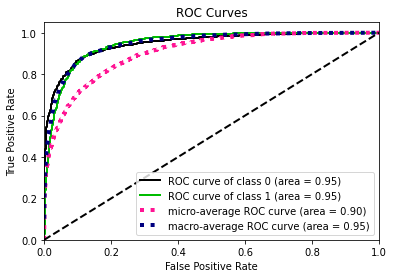

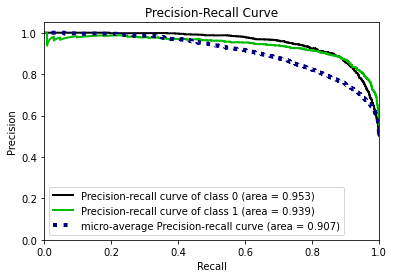

In [19]:
y_prob =  model.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_prob)
skplt.metrics.plot_precision_recall_curve(y_test, y_prob)

In [6]:
### jax
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score


inputs =X_train
targets = y_train
# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []
_precision = []
_recal = []
_f1 = []
_auc_pr = []
_roc_pr = []
# Define the K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train_index, test_index  in kfold.split(inputs, targets):
    
    X_train= inputs[train_index]
    y_train= targets[train_index]

    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    model = XGBClassifier( n_jobs=24, random_state=42, verbosity=1)
    model.fit(X_train,y_train)
    # Generate generalization metrics

    # predict probabilities for test set
    y_predict = model.predict(X_test)

    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_predict, y_test)
    print('Accuracy: %f' % accuracy)
    # precision tp / (tp + fp)
    precision = precision_score(y_predict,y_test)
    print('Precision: %f' % precision)
    # recall: tp / (tp + fn)
    recall = recall_score(y_predict,y_test)
    print('Recall: %f' % recall)
    # f1: 2 tp / (2 tp + fp + fn)
    f1 =  f1_score(y_predict,y_test)
    print('F1 score: %f' % f1)
    
    acc_per_fold.append(accuracy * 100)
    _precision.append(precision * 100)  
    _recal.append(recall * 100)  
    _f1.append(f1 * 100)  
 
    # Increase fold number
    fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Pecision: {np.mean(_precision)} (+- {np.std(_precision)})')
print(f'> Recall: {np.mean(_recal)} (+- {np.std(_recal)})')
print(f'> F1: {np.mean(_f1)} (+- {np.std(_f1)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Accuracy: 0.826772
Precision: 0.690664
Recall: 0.948995
F1 score: 0.799479
------------------------------------------------------------------------
Training for fold 2 ...
Accuracy: 0.823678
Precision: 0.680540
Recall: 0.953507
F1 score: 0.794224
------------------------------------------------------------------------
Training for fold 3 ...
Accuracy: 0.816367
Precision: 0.665354
Recall: 0.953263
F1 score: 0.783703
------------------------------------------------------------------------
Training for fold 4 ...
Accuracy: 0.820304
Precision: 0.679978
Recall: 0.945270
F1 score: 0.790972
------------------------------------------------------------------------
Training for fold 5 ...
Accuracy: 0.808774
Precision: 0.655793
Recall: 0.944895
F1 score: 0.774236
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 81.91788526434195 (+- 0.6

/home/ubuntu/.local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ubuntu/.local/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [16]:
model = XGBClassifier()
model.load_model("/mnt/vdb/thesis/best_XGBmodel.model")
# summarize model.
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=24, num_parallel_tree=1,
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='auto', validate_parameters=1,
              verbosity=1)

	Brier: 0.138
	Precision: 0.948
	Recall: 0.695
	F1: 0.802



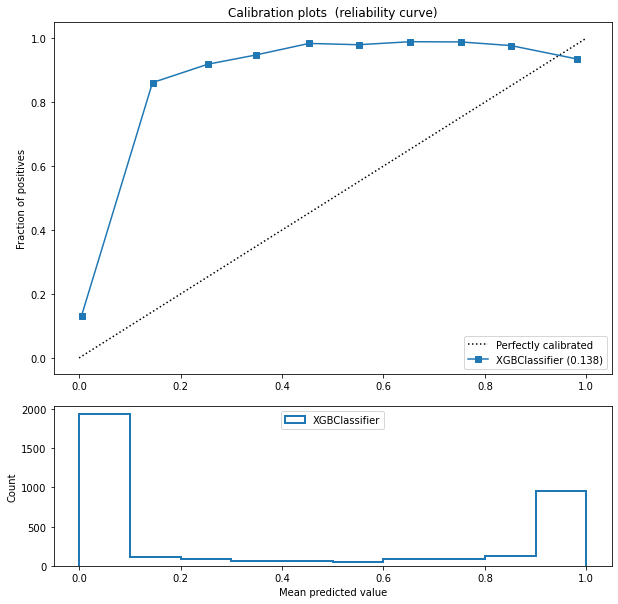

In [18]:
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,
                             f1_score)
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
name = "XGBClassifier"

fig = plt.figure( figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")


y_pred = model.predict(X_test)
if hasattr(model, "predict_proba"):
    prob_pos = model.predict_proba(X_test)[:, 1]
else:  # use decision function
    prob_pos = model.decision_function(X_test)
    prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())

clf_score = brier_score_loss(y_test, prob_pos)

print("\tBrier: %1.3f" % (clf_score)) # Brier score, reported in the legend (the smaller the better).
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=10)

ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
                 label="%s (%1.3f)" % (name, clf_score))

ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
                 histtype="step", lw=2)
 
ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

TypeError: predict_proba() got an unexpected keyword argument 'X'

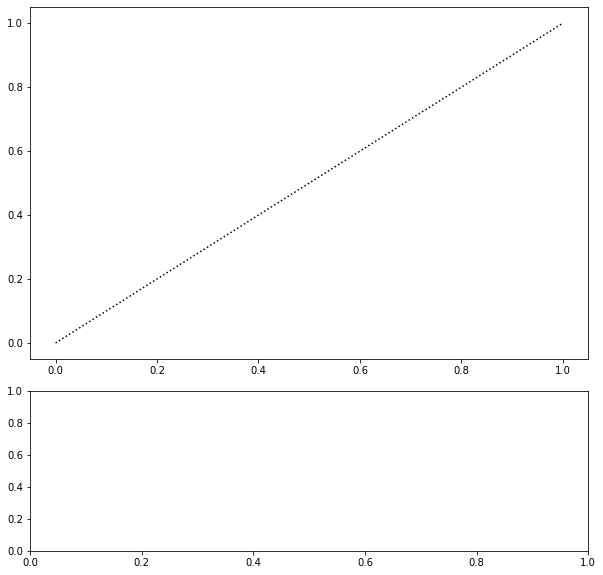

In [20]:
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,
                             f1_score)
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
name = "XGBClassifier"

fig = plt.figure( figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

 # Calibrated with isotonic calibration
model = CalibratedClassifierCV(model, cv=5, method='isotonic')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
if hasattr(model, "predict_proba"):
    prob_pos = model.predict_proba(X_test)[:, 1]
else:  # use decision function
    prob_pos = model.decision_function(X_test)
    prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())

clf_score = brier_score_loss(y_test, prob_pos)

print("\tBrier: %1.3f" % (clf_score)) # Brier score, reported in the legend (the smaller the better).
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=10)

ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
                 label="%s (%1.3f)" % (name, clf_score))

ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
                 histtype="step", lw=2)
 
ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

## SET 10

In [5]:
XGBmodel = XGBClassifier( n_jobs=24, random_state=42, verbosity=1)
XGBmodel.fit(X_train,y_train) 
pred = XGBmodel.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82      1778
           1       0.85      0.73      0.79      1778

    accuracy                           0.80      3556
   macro avg       0.81      0.80      0.80      3556
weighted avg       0.81      0.80      0.80      3556



/home/ubuntu/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

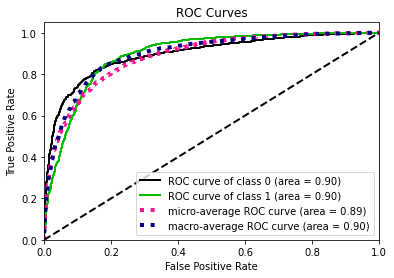

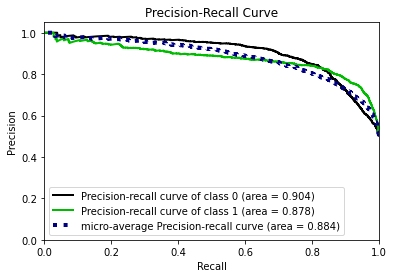

In [7]:
y_prob =  XGBmodel.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_prob)
skplt.metrics.plot_precision_recall_curve(y_test, y_prob)

In [8]:
XGBmodel.save_model("/mnt/vdb/thesis/best_XGBmodel.set10.model")

              precision    recall  f1-score   support

           0       0.76      0.88      0.82      1778
           1       0.86      0.73      0.79      1778

    accuracy                           0.80      3556
   macro avg       0.81      0.80      0.80      3556
weighted avg       0.81      0.80      0.80      3556



/home/ubuntu/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

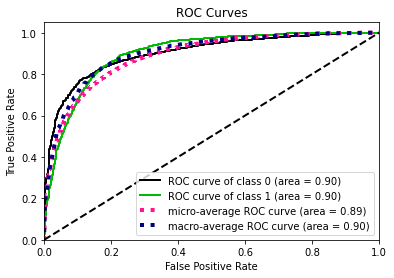

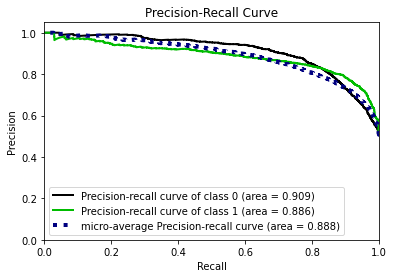

In [5]:
XGBmodel = XGBClassifier( n_jobs=24, random_state=42, verbosity=1)
XGBmodel.fit(X_train,y_train) 
pred = XGBmodel.predict(X_test)
print(classification_report(y_test,pred))
y_prob =  XGBmodel.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_prob)
skplt.metrics.plot_precision_recall_curve(y_test, y_prob)

# Benchmark with threshold

In [10]:
# set 10
# Load model 
model = XGBClassifier()
model.load_model("/mnt/vdb/thesis/best_XGBmodel.set10.model")
# summarize model.
model

with open( "/mnt/vdb/thesis/trainingset2/benchmark_set/jax/AMPNonAMP.benchmark_set.reps", 'rb') as file:
    benchmark_AMPs_df = pickle.load(file)
    
X_test = np.array(benchmark_AMPs_df["reps"].to_list())
y_test = np.array( benchmark_AMPs_df["class"].to_list())

Best Threshold=0.334932, G-Mean=0.833


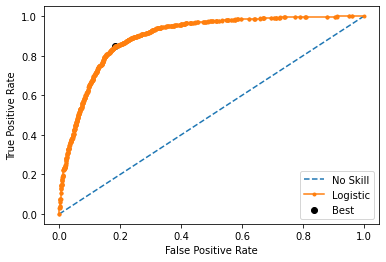

๋Best Threshold=0.334932


In [5]:
from sklearn.metrics import roc_curve, roc_auc_score
from numpy import sqrt
from numpy import argmax
from matplotlib import pyplot
# calculate scores
lr_auc= roc_auc_score(y_test, predicted_proba[:,1]) # keep probabilities for the positive outcome only
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, predicted_proba[:,1])

# calculate the g-mean for each threshold $ G-Mean = sqrt(Sensitivity * Specificity)
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

# t turns out there is a much faster way to get the same result, called the Youden’s J statistic.

# The statistic is calculated as: J = Sensitivity + Specificity – 1
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('๋Best Threshold=%f' % (best_thresh))

In [6]:
pred = model.predict(X_test)
threshold = 0.33
predicted_proba = model.predict_proba(X_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1778
           1       0.82      0.85      0.83      1778

    accuracy                           0.83      3556
   macro avg       0.83      0.83      0.83      3556
weighted avg       0.83      0.83      0.83      3556



In [4]:
pred = model.predict(X_test)
threshold = 0.5
predicted_proba = model.predict_proba(X_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82      1778
           1       0.85      0.73      0.79      1778

    accuracy                           0.80      3556
   macro avg       0.81      0.80      0.80      3556
weighted avg       0.81      0.80      0.80      3556



In [28]:
pred = model.predict(X_test)
threshold = 0.37
predicted_proba = model.predict_proba(X_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1778
           1       0.83      0.82      0.83      1778

    accuracy                           0.83      3556
   macro avg       0.83      0.83      0.83      3556
weighted avg       0.83      0.83      0.83      3556



In [3]:
# set 9 pssm
# Load model 
model = XGBClassifier()
model.load_model("/mnt/vdb/thesis/best_XGBmodel.pssm.model")
# summarize model.
model

with open( "../datasets/thesis/trainingset2/benchmark_set/AMPnonAMP.pssm.pkl", 'rb') as file:
    benchmark_AMPs_df = pickle.load(file)
    
X_test = np.array(benchmark_AMPs_df["reps"].to_list())
y_test = np.array( benchmark_AMPs_df["class"].to_list())

In [4]:
pred = model.predict(X_test)
threshold = 0.5
predicted_proba = model.predict_proba(X_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1778
           1       0.83      0.79      0.81      1778

    accuracy                           0.81      3556
   macro avg       0.81      0.81      0.81      3556
weighted avg       0.81      0.81      0.81      3556



In [11]:
pred = model.predict(X_test)
threshold = 0.46
predicted_proba = model.predict_proba(X_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1778
           1       0.82      0.82      0.82      1778

    accuracy                           0.82      3556
   macro avg       0.82      0.82      0.82      3556
weighted avg       0.82      0.82      0.82      3556



# Benchmark 920

In [8]:
# set 10 jax
# Load model 
model = XGBClassifier()
model.load_model("/mnt/vdb/thesis/best_XGBmodel.set10.model")
# summarize model.
model

with open( "/mnt/vdb/thesis/trainingset2/benchmark_set_920/jax/AMPNonAMP.benchmark_set.reps", 'rb') as file:
    benchmark_AMPs_df = pickle.load(file)
    
X_test = np.array(benchmark_AMPs_df["reps"].to_list())
y_test = np.array( benchmark_AMPs_df["class"].to_list())
pred = model.predict(X_test)
threshold = 0.37
predicted_proba = model.predict_proba(X_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.70      0.87      0.78       920
           1       0.83      0.62      0.71       920

    accuracy                           0.75      1840
   macro avg       0.76      0.75      0.74      1840
weighted avg       0.76      0.75      0.74      1840



# Benchmark 721

In [11]:
from Bio import SeqIO
amp_fasta= "../datasets/thesis/trainingset2/benchmark_set/721/test.only.fa"
with open(amp_fasta) as fasta_file:  # Will close handle cleanly
    identifiers = []
    lengths = []
    sequence = []
    for seq_record in SeqIO.parse(fasta_file, 'fasta'):  # (generator)
        identifiers.append(seq_record.id)
        sequence.append(str(seq_record.seq))
        lengths.append(len(seq_record.seq))

test_df = pd.DataFrame(list(zip(identifiers, sequence, lengths)), columns =['ID', 'Sequence', 'length']) 
test_df # 127018

,ID,Sequence,length
0,AP01235,FNKLKQGSSKRTCAKCFRKIMPSVHELDERRRGANRWAAGFRKCVS...,51
1,AP02387,RLGTALPALLKTLLAGLNG,19
2,AP02150,YEALVTSILGKLTGLWHNDSVDFMGHICYFRRRPKIRRFKLYHEGK...,65
3,AP00314,VFCTCRGFLCGSGERASGSCTINGVRHTLCCRR,33
4,AP01183,ATYYGNGLYCNKEKCWVDWNQAKGEIGKIIVNGWVNHGPWAPRR,44
...,...,...,...
1419,UniRef50_Q2FLE8,PYYWINGPLVTDAPEGTDVHAIHKGNISI,29
1420,UniRef50_A8QA64,WLGERWVVQTVLP,13
1421,UniRef50_Q9V4S8,PGTSGGLGQSELR,13
1422,UniRef50_Q8EFB4,ELIQGLTQPVLGVCLGMQMLTLLSKERGGQALDCQAHDCKCLGIIP...,79


In [17]:
benchmark_AMPs_df = benchmark_AMPs_df[benchmark_AMPs_df.ID.isin(test_df["ID"].to_list())]
X_test = np.array(benchmark_AMPs_df["reps"].to_list())
y_test = np.array( benchmark_AMPs_df["class"].to_list())
threshold = 0.34

predicted_proba = model.predict_proba(X_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       712
           1       0.83      0.84      0.83       712

    accuracy                           0.83      1424
   macro avg       0.83      0.83      0.83      1424
weighted avg       0.83      0.83      0.83      1424

